### Download weights from drive before running this notebook

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from utils.utils_stylegan2 import convert_images_to_uint8

In [2]:
def plot_images(gen, seed, w_avg, truncation_psi=1):
    """ plot images from generator output """
    # creating random latent vector
    rnd = np.random.RandomState(seed)
    z = rnd.randn(3, 512).astype('float32')

    # running mapping network
    dlatents = gen.mapping_network(z)
    # adjusting dlatents depending on truncation psi, if truncatio_psi = 1, no adjust
    dlatents = w_avg + (dlatents - w_avg) * truncation_psi 
    # running synthesis network
    out = gen.synthesis_network(dlatents)
        
    print('image shape: ', out.shape)

    #converting image/s to uint8
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)

    #plotting images
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,15))
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    img_plot = ax1.imshow(img.numpy()[0])
    img_plot = ax2.imshow(img.numpy()[1])
    img_plot = ax3.imshow(img.numpy()[2])

### Machine configuration

In [3]:
impl = 'cuda' # 'ref' if cuda is not available in your machine
gpu = True # False if tensorflow cpu is used

# Load stylegan2 generator

In [4]:
from stylegan2_generator import StyleGan2Generator

#### Loading ffhq stylegan2

Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loaded ffhq generator weights!
image shape:  (3, 3, 1024, 1024)
image shape:  (3, 3, 1024, 1024)


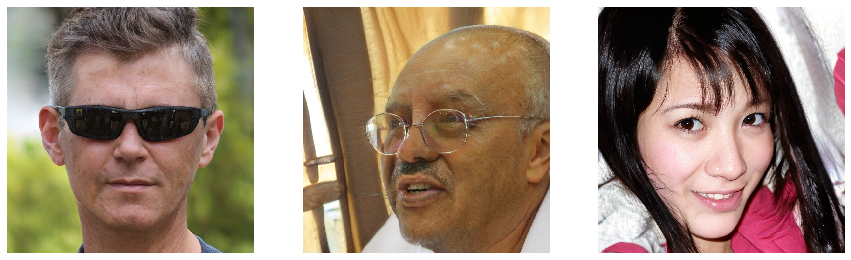

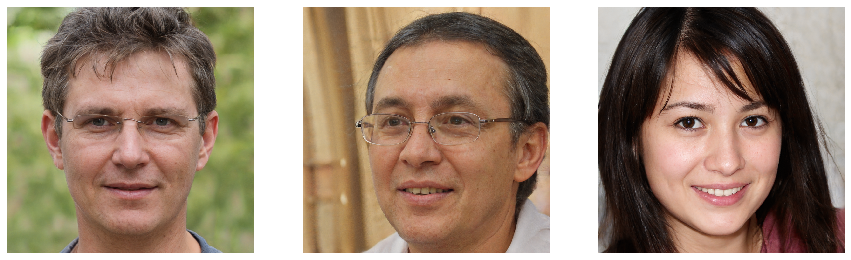

In [5]:
weights_name = 'ffhq' # face model trained by Nvidia

# instantiating generator network
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

# loading w average
w_average = np.load('weights/{}_dlatent_avg.npy'.format(weights_name))

# not using truncation
plot_images(generator, seed=96, w_avg=w_average)

# using truncation 0.5
plot_images(generator, seed=96, w_avg=w_average, truncation_psi=0.5)

#### Loading car stylegan2

Loaded car generator weights!
image shape:  (3, 3, 512, 512)
image shape:  (3, 3, 512, 512)


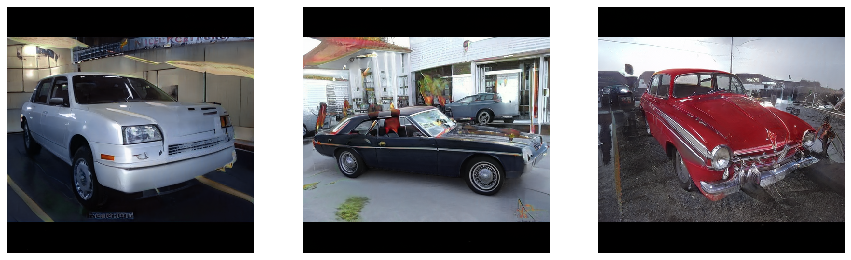

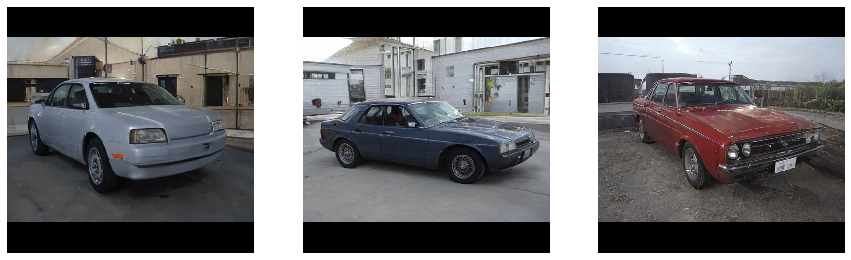

In [6]:
weights_name = 'car' # church model trained by Nvidia

# instantiating generator network
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

# loading w average
w_average = np.load('weights/{}_dlatent_avg.npy'.format(weights_name))

# not using truncation
plot_images(generator, seed=4, w_avg=w_average)

# using truncation 0.5
plot_images(generator, seed=4, w_avg=w_average, truncation_psi=0.5)

#### Loading cat stylegan2

Loaded cat generator weights!
image shape:  (3, 3, 256, 256)
image shape:  (3, 3, 256, 256)


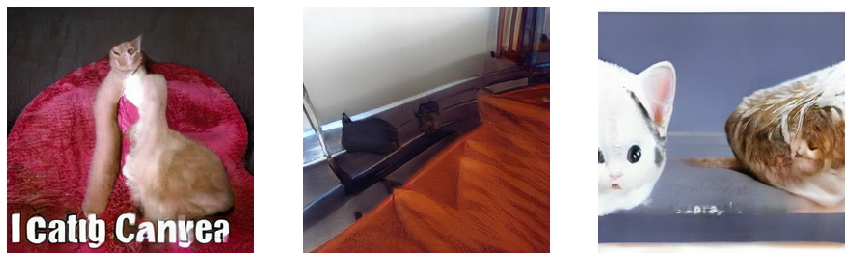

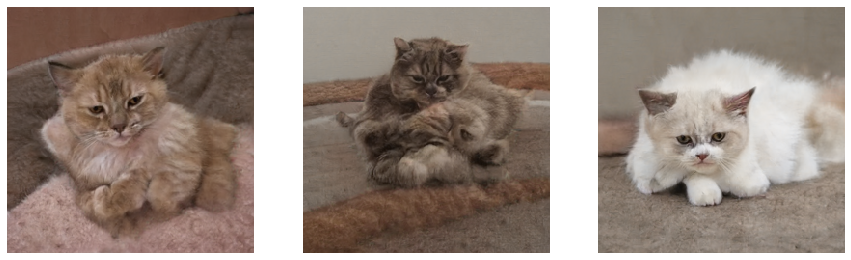

In [7]:
weights_name = 'cat' # church model trained by Nvidia

# instantiating generator network
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

# loading w average
w_average = np.load('weights/{}_dlatent_avg.npy'.format(weights_name))

# not using truncation
plot_images(generator, seed=6, w_avg=w_average)

# using truncation 0.3
plot_images(generator, seed=6, w_avg=w_average, truncation_psi=0.3)

#looks like the training was made also using cat memes :')

#### Loading church stylegan2

Loaded church generator weights!
image shape:  (3, 3, 256, 256)
image shape:  (3, 3, 256, 256)


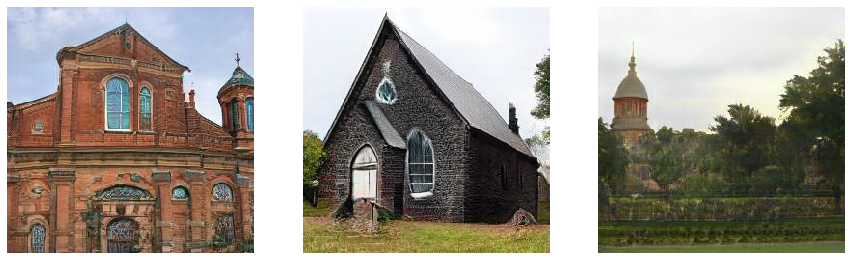

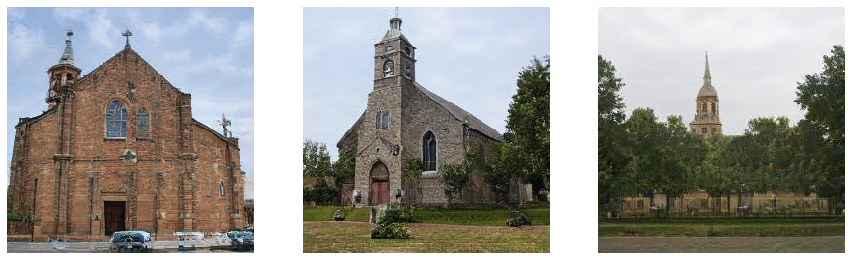

In [8]:
weights_name = 'church' # church model trained by Nvidia

# instantiating generator network
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

# loading w average
w_average = np.load('weights/{}_dlatent_avg.npy'.format(weights_name))

# not using truncation
plot_images(generator, seed=1, w_avg=w_average)

# using truncation 0.5
plot_images(generator, seed=1, w_avg=w_average, truncation_psi=0.5)

#### Loading horse stylegan2

Loaded horse generator weights!
image shape:  (3, 3, 256, 256)
image shape:  (3, 3, 256, 256)


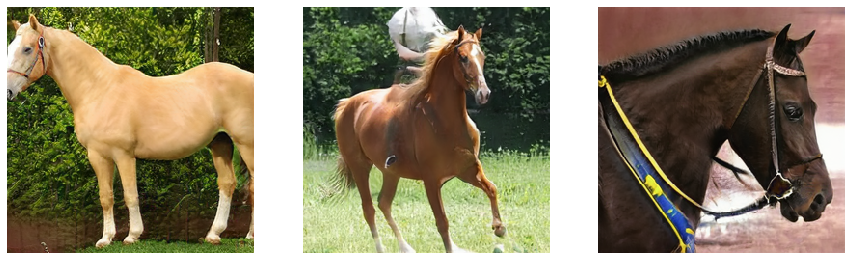

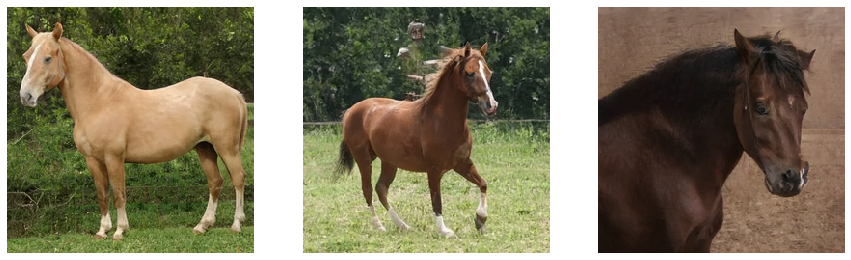

In [9]:
weights_name = 'horse' # church model trained by Nvidia

# instantiating generator network
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

# loading w average
w_average = np.load('weights/{}_dlatent_avg.npy'.format(weights_name))

# not using truncation
plot_images(generator, seed=0, w_avg=w_average)

# using truncation 0.5
plot_images(generator, seed=0, w_avg=w_average, truncation_psi=0.5)

#### Create new stylegan2

image shape:  (3, 3, 512, 512)


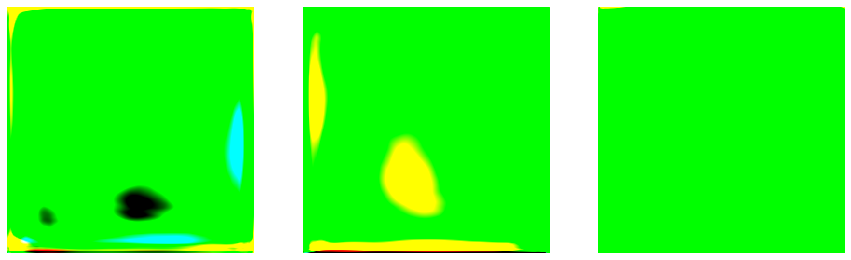

In [11]:
resolution = 512 # output resolution, square image power of 2

# instantiating generator network
generator = StyleGan2Generator(resolution=resolution, impl=impl, gpu=gpu)

plot_images(generator, seed=10, w_avg=np.zeros(512,))

# Load stylegan2 entire model

In [12]:
from stylegan2 import StyleGan2

Loaded horse generator weights!
Loaded horse discriminator weights!
tf.Tensor(
[[-0.23971188]
 [-0.4821849 ]
 [-0.3215307 ]], shape=(3, 1), dtype=float32)
image shape:  (3, 3, 256, 256)


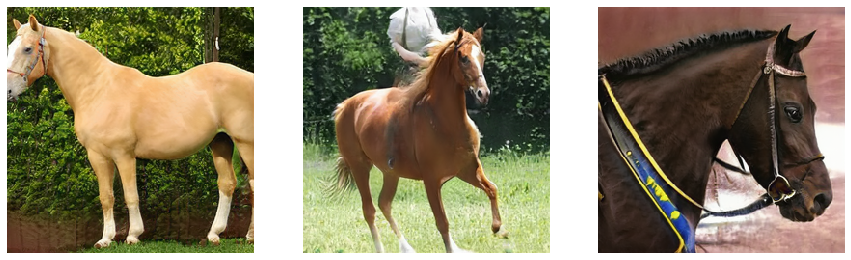

In [13]:
weights_name = 'horse' # church model trained by Nvidia

# instantiating stylegan2 model, generator and discriminator
model = StyleGan2(weights=weights_name, impl=impl, gpu=gpu)

seed = 0
#getting random latent vectors
rnd = np.random.RandomState(seed)
z = rnd.randn(3, 512).astype('float32')

# getting generator output
out_image = model.generator(z)

# getting discriminator output
score = model.discriminator(out_image)

#scores
print(score)

# loading w average
w_average = np.load('weights/{}_dlatent_avg.npy'.format(weights_name))

# not using truncation
plot_images(model.generator, seed=seed, w_avg=w_average)